### ARX Example

In [1]:
import pandas as pd
from pyaaas import ARXaaS,Dataset,AttributeType

### Importing the data to be anonymized

In [2]:
df = pd.read_csv("../../data/ARX-example/example.csv", sep=";")
df

,sex,age,race,marital-status,education,native-country,workclass,occupation,salary-class,ldl
0,Male,39,White,Never-married,Bachelors,United-States,State-gov,Adm-clerical,<=50K,4.605519
1,Male,50,White,Married-civ-spouse,Bachelors,United-States,Self-emp-not-inc,Exec-managerial,<=50K,9.214000
2,Male,38,White,Divorced,HS-grad,United-States,Private,Handlers-cleaners,<=50K,2.174092
3,Male,53,Black,Married-civ-spouse,11th,United-States,Private,Handlers-cleaners,<=50K,8.443494
4,Female,28,Black,Married-civ-spouse,Bachelors,Cuba,Private,Prof-specialty,<=50K,6.056590
5,Female,37,White,Married-civ-spouse,Masters,United-States,Private,Exec-managerial,<=50K,8.926111
6,Female,49,Black,Married-spouse-absent,9th,Jamaica,Private,Other-service,<=50K,2.876953
7,Male,52,White,Married-civ-spouse,HS-grad,United-States,Self-emp-not-inc,Exec-managerial,>50K,8.560344
8,Female,31,White,Never-married,Masters,United-States,Private,Prof-specialty,>50K,6.829662
9,Male,42,White,Married-civ-spouse,Bachelors,United-States,Private,Exec-managerial,>50K,3.003453


### Create Dataset and set attribute types

In [5]:
dataset = Dataset.from_pandas(df)

In [15]:
dataset.describe()

data:
  headers:
    ['sex', 'age', 'race', 'marital-status', 'education', 'native-country', 'workclass', 'occupation', 'salary-class', 'ldl']
rows:
    ['Male', 39, 'White', 'Never-married', '...', 'State-gov', 'Adm-clerical', '<=50K', 4.6055187127999995]
    ['Male', 50, 'White', 'Married-civ-spouse', '...', 'Self-emp-not-inc', 'Exec-managerial', '<=50K', 9.2139997216]
    ['Male', 38, 'White', 'Divorced', '...', 'Private', 'Handlers-cleaners', '<=50K', 2.1740924163]
    ['Male', 53, 'Black', 'Married-civ-spouse', '...', 'Private', 'Handlers-cleaners', '<=50K', 8.4434937206]
    ['Female', 28, 'Black', 'Married-civ-spouse', '...', 'Private', 'Prof-specialty', '<=50K', 6.0565897703]
    ...
attributes:
  field_name=sex, type=QUASIIDENTIFYING, hierarchy=None
  field_name=age, type=QUASIIDENTIFYING, hierarchy=None
  field_name=race, type=IDENTIFYING, hierarchy=None
  field_name=marital-status, type=QUASIIDENTIFYING, hierarchy=None
  field_name=education, type=QUASIIDENTIFYING, hierarchy

In [7]:
dataset.set_attribute_type(AttributeType.IDENTIFYING,'race','ldl')
dataset.set_attribute_type(AttributeType.SENSITIVE,'workclass','salary-class')

### Create RiskProfile

In [8]:
arxaas = ARXaaS("http://localhost:8080")

In [9]:
risk_profile = arxaas.risk_profile(dataset)

In [10]:
risk_profile.re_identification_risk

{'estimated_journalist_risk': 1.0,
 'records_affected_by_highest_prosecutor_risk': 0.2891054969829587,
 'sample_uniques': 0.2891054969829587,
 'lowest_risk': 0.0196078431372549,
 'estimated_prosecutor_risk': 1.0,
 'highest_journalist_risk': 1.0,
 'records_affected_by_lowest_risk': 0.0033485843113851867,
 'average_prosecutor_risk': 0.4327962336715072,
 'estimated_marketer_risk': 0.4327962336715072,
 'highest_prosecutor_risk': 1.0,
 'records_affected_by_highest_journalist_risk': 0.2891054969829587,
 'population_uniques': 0.04087636338034109}

In [11]:
risk_profile.attacker_success_rate

{'Prosecutor_attacker_success_rate': 0.4327962336715072,
 'Marketer_attacker_success_rate': 0.4327962336715072,
 'Journalist_attacker_success_rate': 0.4327962336715072}

In [12]:
risk_profile.quasi_identifiers

['education', 'occupation', 'native-country', 'sex', 'marital-status', 'age']

In [13]:
risk_profile.population_model

'PITMAN'

In [14]:
risk_profile.distribution_of_risk

{'riskIntervalList': [{'interval': ']50,100]',
   'recordsWithRiskWithinInteval': 0.2891054969829587,
   'recordsWithMaxmalRiskWithinInterval': 1.0},
  {'interval': ']33.4,50]',
   'recordsWithRiskWithinInteval': 0.11597374179431072,
   'recordsWithMaxmalRiskWithinInterval': 0.7108945030170414},
  {'interval': ']25,33.4]',
   'recordsWithRiskWithinInteval': 0.08046548637358265,
   'recordsWithMaxmalRiskWithinInterval': 0.5949207612227306},
  {'interval': ']20,25]',
   'recordsWithRiskWithinInteval': 0.057290630594788144,
   'recordsWithMaxmalRiskWithinInterval': 0.514455274849148},
  {'interval': ']16.7,20]',
   'recordsWithRiskWithinInteval': 0.0459187056561236,
   'recordsWithMaxmalRiskWithinInterval': 0.4571646442543598},
  {'interval': ']14.3,16.7]',
   'recordsWithRiskWithinInteval': 0.038591605331211455,
   'recordsWithMaxmalRiskWithinInterval': 0.4112459385982362},
  {'interval': ']12.5,14.3]',
   'recordsWithRiskWithinInteval': 0.035044095219149925,
   'recordsWithMaxmalRiskWit

### Anonymize

#### Import hierarchy files

In [24]:
sex_hierarchy = pd.read_csv("../../hierarchies/ARX-example/example_hierarchy_sex.csv", sep=';', header=None)
age_hierarchy = pd.read_csv("../../hierarchies/ARX-example/example_hierarchy_age.csv", sep=';', header=None)
#race_hierarchy = pd.read_csv("../../hierarchies/ARX-example/example_hierarchy_race.csv, sep=';', header=None)
marital_status_hierarchy = pd.read_csv("../../hierarchies/ARX-example/example_hierarchy_martial_status.csv", sep=';', header=None)
education_hierarchy = pd.read_csv("../../hierarchies/ARX-example/example_hierarchy_education.csv", sep=';', header=None)
native_country_hierarchy = pd.read_csv("../../hierarchies/ARX-example/example_hierarchy_native_country.csv", sep=';', header=None)
#workclass_hierarchy = pd.read_csv("../../hierarchies/ARX-example/example_hierarchy_workclass.csv", sep=';', header=None)
occupation_hierarchy = pd.read_csv("../../hierarchies/ARX-example/example_hierarchy_occupation.csv", sep=';', header=None)
#salary_class_hierarchy = pd.read_csv("../../hierarchies/ARX-example/example_hierarchy_salary-class.csv", sep=';', header=None)

#### Setting the hierarchies

In [25]:
dataset.set_hierarchy('sex',sex_hierarchy)
dataset.set_hierarchy('age',age_hierarchy)
#dataset.set_hierarchy('race',race_hierarchy)
dataset.set_hierarchy('marital-status',marital_status_hierarchy)
dataset.set_hierarchy('education',education_hierarchy)
dataset.set_hierarchy('native-country',native_country_hierarchy)
#dataset.set_hierarchy('workclass',workclass_hierarchy)
dataset.set_hierarchy('occupation',occupation_hierarchy)
#dataset.set_hierarchy('salary-class',salary_class_hierarchy)

#### Setting the privacy model

In [26]:
from pyaaas.privacy_models import KAnonymity,LDiversityDistinct,TClosenessEqualDistance

In [27]:
kanon = KAnonymity(2)
lanon = LDiversityDistinct(2,'workclass')
tanon = TClosenessEqualDistance(0.0001,'salary-class')

In [28]:
anon_result = arxaas.anonymize(dataset,[kanon,lanon,tanon],0.002)

In [29]:
anon_result.dataset.to_dataframe()

,sex,age,race,marital-status,education,native-country,workclass,occupation,salary-class,ldl
0,*,*,*,*,*,*,State-gov,*,<=50K,*
1,*,*,*,*,*,*,Self-emp-not-inc,*,<=50K,*
2,*,*,*,*,*,*,Private,*,<=50K,*
3,*,*,*,*,*,*,Private,*,<=50K,*
4,*,*,*,*,*,*,Private,*,<=50K,*
5,*,*,*,*,*,*,Private,*,<=50K,*
6,*,*,*,*,*,*,Private,*,<=50K,*
7,*,*,*,*,*,*,Self-emp-not-inc,*,>50K,*
8,*,*,*,*,*,*,Private,*,>50K,*
9,*,*,*,*,*,*,Private,*,>50K,*


#### Hierarchy level applied

In [30]:
anon_metrics = anon_result.anonymization_metrics

In [31]:
anon_metrics.attribute_generalization

[{'name': 'sex',
  'type': 'QUASI_IDENTIFYING_ATTRIBUTE',
  'generalizationLevel': 1},
 {'name': 'age',
  'type': 'QUASI_IDENTIFYING_ATTRIBUTE',
  'generalizationLevel': 4},
 {'name': 'marital-status',
  'type': 'QUASI_IDENTIFYING_ATTRIBUTE',
  'generalizationLevel': 2},
 {'name': 'education',
  'type': 'QUASI_IDENTIFYING_ATTRIBUTE',
  'generalizationLevel': 3},
 {'name': 'native-country',
  'type': 'QUASI_IDENTIFYING_ATTRIBUTE',
  'generalizationLevel': 2},
 {'name': 'occupation',
  'type': 'QUASI_IDENTIFYING_ATTRIBUTE',
  'generalizationLevel': 2}]

#### re-identification risk

In [32]:
anon_risk_profile = anon_result.risk_profile

In [33]:
anon_risk_profile.re_identification_risk

{'estimated_journalist_risk': 3.315430011272462e-05,
 'records_affected_by_highest_prosecutor_risk': 1.0,
 'sample_uniques': 0.0,
 'lowest_risk': 3.315430011272462e-05,
 'estimated_prosecutor_risk': 3.315430011272462e-05,
 'highest_journalist_risk': 3.315430011272462e-05,
 'records_affected_by_lowest_risk': 1.0,
 'average_prosecutor_risk': 3.315430011272462e-05,
 'estimated_marketer_risk': 3.315430011272462e-05,
 'highest_prosecutor_risk': 3.315430011272462e-05,
 'records_affected_by_highest_journalist_risk': 1.0,
 'population_uniques': 0.0}

In [38]:
before_risk = risk_profile.re_identification_risk_dataframe()[['estimated_prosecutor_risk', 'highest_prosecutor_risk', 'lowest_risk']].copy()
before_risk["from"] = "before"

In [39]:
after_risk = anon_risk_profile.re_identification_risk_dataframe()[['estimated_prosecutor_risk', 'highest_prosecutor_risk', 'lowest_risk']].copy()
after_risk["from"] = "after"

In [40]:
risks_df = pd.concat([before_risk, after_risk])

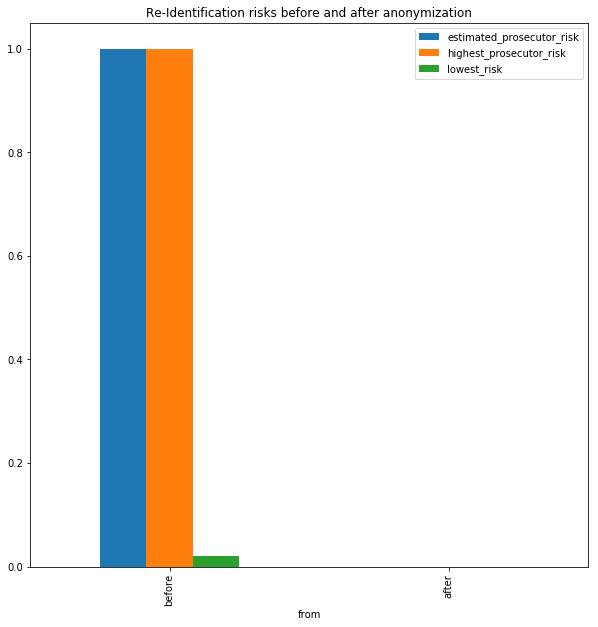

In [41]:
risks_df.plot(kind="bar", x="from", title="Re-Identification risks before and after anonymization", figsize=(10, 10));